In [10]:
import pandas as pd

# Load the CSV file, adjust the path if needed
# If the file is in the same directory as the script:
df = pd.read_csv ("/content/customer_support_tickets.csv")
# Or, provide the full path:
# df = pd.read_csv("/path/to/your/file/customer_support_tickets.csv")

# Display column names and first 5 rows
print("Columns:", df.columns.tolist())
print("\nFirst 5 rows:\n", df.head().to_markdown(index=False))


Columns: ['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age', 'Customer Gender', 'Product Purchased', 'Date of Purchase', 'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status', 'Resolution', 'Ticket Priority', 'Ticket Channel', 'First Response Time', 'Time to Resolution', 'Customer Satisfaction Rating']

First 5 rows:
 |   Ticket ID | Customer Name       | Customer Email             |   Customer Age | Customer Gender   | Product Purchased   | Date of Purchase   | Ticket Type     | Ticket Subject           | Ticket Description                                                                                                                                                                                                                                                         | Ticket Status             | Resolution                                    | Ticket Priority   | Ticket Channel   | First Response Time   | Time to Resolution   |   Customer Satisfaction Rat

In [13]:
# Remove placeholder text
df["Ticket Description"] = df["Ticket Description"].str.replace(r"Please note:.*?\"", "", regex=True)
# Standardize product names
df["Product Purchased"] = df["Product Purchased"].str.replace(r"HP Pavilion 15-inch", "HP Pavilion", regex=True)

In [16]:
def categorize_issue(description):
    description = description.lower()
    if "data loss" in description or "disappeared" in description:
        return "Data Loss"
    elif "refund" in description or "dissatisfied" in description:
        return "Refund Request"
    elif "billing" in description or "payment" in description:
        return "Billing Inquiry"
    else:
        return "Other"
df["Issue_Category"] = df["Ticket Description"].apply(categorize_issue)

In [17]:
category_counts = df["Issue_Category"].value_counts()
print(category_counts)

Issue_Category
Other              7870
Data Loss           344
Refund Request      158
Billing Inquiry      97
Name: count, dtype: int64


In [18]:
product_counts = df["Product Purchased"].value_counts().head(10)
print(product_counts)

Product Purchased
Canon EOS              240
GoPro Hero             228
Nest Thermostat        225
Amazon Echo            221
Philips Hue Lights     221
LG Smart TV            219
Sony Xperia            217
Roomba Robot Vacuum    216
Apple AirPods          213
LG OLED                213
Name: count, dtype: int64


In [20]:
from textblob import TextBlob
df["sentiment"] = df["Ticket Description"].apply(lambda x: TextBlob(x).sentiment.polarity)
df["sentiment_label"] = pd.cut(df["sentiment"], bins=[-1, 0, 0.5, 1], labels=["Negative", "Neutral", "Positive"])

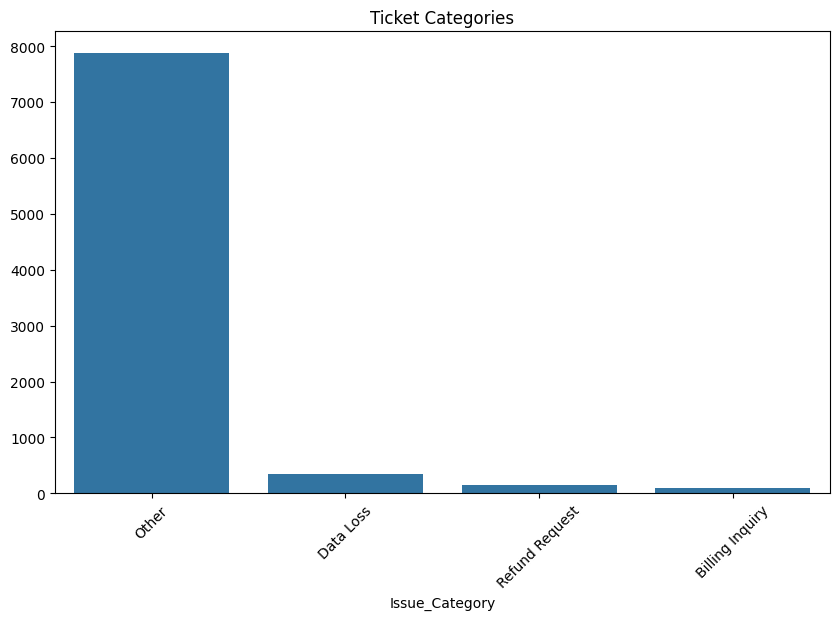

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart for categories
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title("Ticket Categories")
plt.xticks(rotation=45)
plt.savefig("ticket_categories.png")
plt.show()

In [22]:
df.to_csv("cleaned_tickets.csv", index=False)